<a href="https://colab.research.google.com/github/mariepiersbBioinfo/kibio_bi/blob/main/case_1/Demo_case_1_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo case # 1

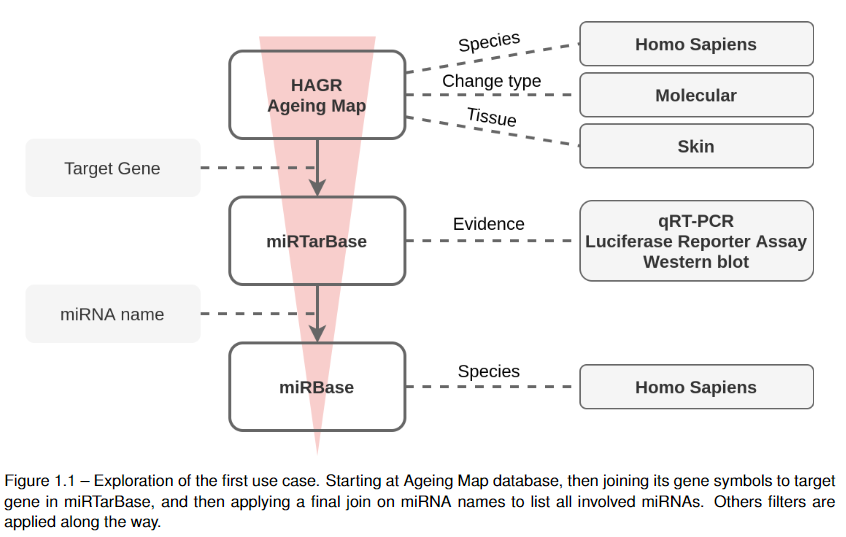

## 1.Data preparation

Since you cannot join data in Kibana and Superset, you need to prepare the data before importing

### 1.1.Install and import Elasticsearch needed librairies

In [ ]:
!pip install eland==7.14.0b1

import eland as ed
import pandas as pd
from elasticsearch import Elasticsearch, helpers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.9/126.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.3.5 which is incompatible.


### 1.2.Create Eland dataframe for the needed indexes from http://es.kibio.science

Eland is used to connect to the indexes needed in case 1 via kibio.science server.

In [ ]:
ageingmap_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="hagr_ageingmap_v2")
print(f'ageingmap :\nlines = ', ageingmap_ed.shape[0] , ', columns = ', ageingmap_ed.shape[1])

mirtarbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirtarbase_v8")
print(f'mirtarbase :\nlines = ', mirtarbase_ed.shape[0] , ', columns = ', mirtarbase_ed.shape[1])

mirbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirbase_v2")
print(f'mirbase :\nlines = ', mirbase_ed.shape[0] , ', columns = ', mirbase_ed.shape[1])

ageingmap :
lines =  4238 , columns =  24
mirtarbase :
lines =  557182 , columns =  10
mirbase :
lines =  38589 , columns =  30


### 1.3.Download a copy of the three indexes into local Pandas dataframe
The eland.Dataframes are converted to pandas.Dataframe using eland function eland_to_pandas. By doing this, the entire indexes are downloaded locally.

In [ ]:
ageingmap = ed.eland_to_pandas(ageingmap_ed)
print(f'ageingmap :\nlines = ', ageingmap.shape[0] , ', columns = ', ageingmap.shape[1])

mirtarbase = ed.eland_to_pandas(mirtarbase_ed)
print(f'mirtarbase :\nlines = ', mirtarbase.shape[0] , ', columns = ', mirtarbase.shape[1])

mirbase = ed.eland_to_pandas(mirbase_ed)
print(f'mirbase :\nlines = ', mirbase.shape[0] , ', columns = ', mirbase.shape[1])

ageingmap :
lines =  4238 , columns =  24
mirtarbase :
lines =  557182 , columns =  10
mirbase :
lines =  38589 , columns =  30


### 1.4.Exploding lists
To perform the query, we need to take care of columns containing lists like "*experiments*" and "*features_evidence*". To do this, pandas function DataFrame.explode is used, transforming each element of a list-like to a row and replicating index values.

In [ ]:
mirtarbase2 = mirtarbase.explode('experiments')
print(f'mirtarbase :\nlines = ', mirtarbase2.shape[0] , ', columns = ', mirtarbase2.shape[1])

mirbase2 = mirbase.explode('features_evidence')
print(f'mirbase :\nlines = ', mirbase2.shape[0] , ', columns = ', mirbase2.shape[1])

mirtarbase :
lines =  586513 , columns =  10
mirbase :
lines =  38589 , columns =  30


### 1.5.Join the three indexes

The three indexes are finally joined using pandas Dataframe.merge function to get the final result.

In [ ]:
joined_db = pd.merge(ageingmap, mirtarbase2, left_on="gene_symbol", right_on="target_gene")

joined_db = pd.merge(joined_db, mirbase2, left_on="mirna", right_on="name")

print(f'joined_db :\nlines = ', joined_db.shape[0] , ', joined_db = ', mirbase2.shape[1])

joined_db :
lines =  20097 , joined_db =  30


## 2.Importation in BI tools

### 2.1Power BI

You can import the indexes in power BI only by copying this script directly into the  **_Get data -> Other -> Python script_** section

In [ ]:
import eland as ed
import pandas as pd
import Elasticsearch

ageingmap_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="hagr_ageingmap_v2")
mirtarbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirtarbase_v8")
mirbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirbase_v2")


ageingmap = ed.eland_to_pandas(ageingmap_ed)
mirtarbase = ed.eland_to_pandas(mirtarbase_ed)
mirbase = ed.eland_to_pandas(mirbase_ed)


### 2.2.Tableau

If you want to import the indexes in Tableau, you can do it by converting pandas objects in csv files

In [ ]:
!pip install eland==7.14.0b1

import eland as ed
import pandas as pd
from elasticsearch import Elasticsearch, helpers

ageingmap_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="hagr_ageingmap_v2")
mirtarbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirtarbase_v8")
mirbase_ed = ed.DataFrame(es_client="http://es.kibio.science:80",es_index_pattern="mirbase_v2")


ageingmap = ed.eland_to_pandas(ageingmap_ed)
ageingmap.to_csv("ageingmap.csv")
mirtarbase = ed.eland_to_pandas(mirtarbase_ed)
mirtarbase.to_csv("mirtarbase.csv")
mirbase = ed.eland_to_pandas(mirbase_ed)
mirbase.to_csv("mirbase.csv")

### 2.3.Kibana, Siren and Superset

#### 2.3.1. Importation by csv file

You can download the joined dataframe from the "_Data preparation_" section in csv format and upload it directly in the tool. 

**Kibana** : https://www.elastic.co/fr/blog/importing-csv-and-log-data-into-elasticsearch-with-file-data-visualizer

**Siren** : https://docs.siren.io/siren-platform-user-guide/11.1/siren-investigate/data-import.html#_importing_data_from_excel_and_csv_files

**Superset** : https://superset.apache.org/docs/creating-charts-dashboards/exploring-data/#loading-csv-data

In [ ]:
joined_db.to_csv("case1.csv")

#### 2.3.2. Importation in Elasticsearch

You can also upload the joined dataframe from the "_Data preparation_" section directly in Elasticsearch with this function. For this to work, you need to execute this locally on the same computer where you installed your Elasticsearch instance.


In [ ]:
def uploadEs():
    ctr = 0

    for index, row in joined_db.iterrows():
        ctr = ctr + 1

        if ctr % 1000 == 0:
            print(ctr)

        jsonDoc = row.to_json()
        
        yield {
           "_index": "ageingmap_mirtarbase_mirbase",
           "_id": ctr,
           "_source": jsonDoc
        }  
        
es = Elasticsearch("http://localhost:9200/")

response = helpers.bulk(es, uploadEs())
print(response)

## 3.Resolve with python

You can analyze this case using python to compare with the results you got with BI tools. Just apply the filters needed on the results object of the "_Data preparation_" section. 

### 3.1.Filter indexes according to query's criterias
The resulting dataframe can be filtered with pandas DataFrame.query function.   
ageingmap :  
   *   species = Homo sapiens
   *   tissues = Skin
   *   change_type = molecular  

mirtarbase :  
   *   experiments = qRT-PCR or Western blot or Luciferase reporter assay  

mirbase :    
   *   organism_name = Homo sapiens  
   *   features_evidence = experimental


In [ ]:
results = joined_db.query('species == "Homo sapiens" and change_type == "molecular" and tissues == "Skin"')
print(f'First query :\nlines = ', results.shape[0] , ', columns = ', results.shape[1])

results = results.query('experiments in ["qRT-PCR", "Western blot", "Luciferase reporter assay"]')
print(f'Second query :\nlines = ', results.shape[0] , ', columns = ', results.shape[1])

results = results.query('organism_name == "Homo sapiens" and features_evidence == "experimental"')
print(f'Third query :\nlines = ', results.shape[0] , ', columns = ', results.shape[1])

First query :
lines =  9981 , columns =  64
Second query :
lines =  194 , columns =  64
Third query :
lines =  141 , columns =  64


### 3.2.Browse results

In [ ]:
results.get(['gene_symbol','species','tissues','change_type','mirna','experiments','features_evidence','organism_name',])


,gene_symbol,species,tissues,change_type,mirna,experiments,features_evidence,organism_name
216,EGFR,Homo sapiens,Skin,molecular,hsa-mir-520b,Luciferase reporter assay,experimental,Homo sapiens
217,EGFR,Homo sapiens,Skin,molecular,hsa-mir-520b,qRT-PCR,experimental,Homo sapiens
218,EGFR,Homo sapiens,Skin,molecular,hsa-mir-520b,Western blot,experimental,Homo sapiens
232,CDKN1A,Homo sapiens,Skin,molecular,hsa-mir-520b,qRT-PCR,experimental,Homo sapiens
233,CDKN1A,Homo sapiens,Skin,molecular,hsa-mir-520b,Luciferase reporter assay,experimental,Homo sapiens
...,...,...,...,...,...,...,...,...
19798,SND1,Homo sapiens,Skin,molecular,hsa-mir-184,Luciferase reporter assay,experimental,Homo sapiens
19801,SND1,Homo sapiens,Skin,molecular,hsa-mir-184,Western blot,experimental,Homo sapiens
19805,TNFAIP2,Homo sapiens,Skin,molecular,hsa-mir-184,Luciferase reporter assay,experimental,Homo sapiens
19806,TNFAIP2,Homo sapiens,Skin,molecular,hsa-mir-184,qRT-PCR,experimental,Homo sapiens
